## Деревья решений

**Что такое дерево решений?**

Дерево решений можно представить как набор вопросов, которые задаются последовательно, чтобы прийти к определенному решению. Это похоже на игру "данетки", где каждый вопрос помогает сузить возможные варианты ответа.

**Дерево решений состоит из:**

* Узлов (вершин), где задаются вопросы.
* Ветвей, которые соединяют узлы и показывают, какой вопрос следует задать в зависимости от предыдущего ответа.
* Листьев, где содержится конечное решение.

Когда алгоритм обучается на данных, он изучает, какие вопросы (или, по-научному, признаки) наиболее важны для принятия решений, и как их лучше упорядочить.



![alt text](tree1.png)

Для данной модели есть два основных вопроса:

1. Как подбирабтся вопросы в развилках?
2. Как подбираются конечные значения целевого признака в узлах?
___

**Нахождение разбиения**

Когда алгоритм строит дерево решений, он выбирает вопросы так, чтобы каждый раз максимально быстро сузить круг возможных ответов. Представьте, что вы пытаетесь угадать, какой фрукт перед вами. Вот как это работает:

* Если первым делом спросить: «Этот фрукт красного цвета?» — вы сразу отсекаете много других фруктов, например, все жёлтые и зелёные.
* А если вы начнёте с вопроса: «Этот фрукт сладкий?» — это не так сильно сузит круг, ведь много фруктов сладкие.

Алгоритм старается выбрать такие вопросы, которые будут максимально полезными и сразу дадут много информации. Сделать это можно если пытаться минимизировать различия в получившихся после разбиения группах.

![alt text](tree4_2.png)

В примере выше у нас получилось 2 группы, в одной из которой практически все все шары красные, а в другой "почти" все синие.

**Пример алгоритма:**

Представьте, что вы играете в игру, где нужно разделить фрукты на «яблоки» и «бананы». У вас есть список признаков: цвет, форма, размер.

1. Алгоритм проверяет, какой признак лучше всего делит фрукты на две группы. Например, цвет может быть полезным: если фрукт жёлтый, то это скорее банан.
2. Если по цвету ещё остаются сомнения (например, есть зелёные бананы и красные яблоки), алгоритм ищет следующий лучший признак — форму. У яблока она круглая, а у банана вытянутая.

___
**Как понять какое значение целевого признака должно быть в конечном узле?**

Все достаточно просто, для классификации будем выбирать самый популярный класс тестовых данных которые оказались в этом узле. Для регрессии же будем вибирать среднее значение по признаку в узле.

Так в примере выше у нас бы получилось: X <= 10, значит шар - синий. X > 10, значит шар - красный. 

In [54]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Синтетические данные
data = {
    'Color': ['Green', 'Yellow', 'Yellow', 'Yellow', 'Green'],
    'Size': ['Small', 'Small', 'Large', 'Small', 'Large'],
    'Label': ['Apple', 'Apple', 'Pear', 'Pear', 'Apple']
}

# Преобразуем данные в DataFrame
df = pd.DataFrame(data)

df


,Color,Size,Label
0,Green,Small,Apple
1,Yellow,Small,Apple
2,Yellow,Large,Pear
3,Yellow,Small,Pear
4,Green,Large,Apple


In [55]:
# Преобразуем категориальные признаки в числовые
df['Color'] = df['Color'].map({'Green': 0, 'Yellow': 1})
df['Size'] = df['Size'].map({'Small': 0, 'Large': 1})
df['Label'] = df['Label'].map({'Apple': 0, 'Pear': 1})

# Определяем признаки и целевую переменную
X = df[['Color', 'Size']]
y = df['Label']

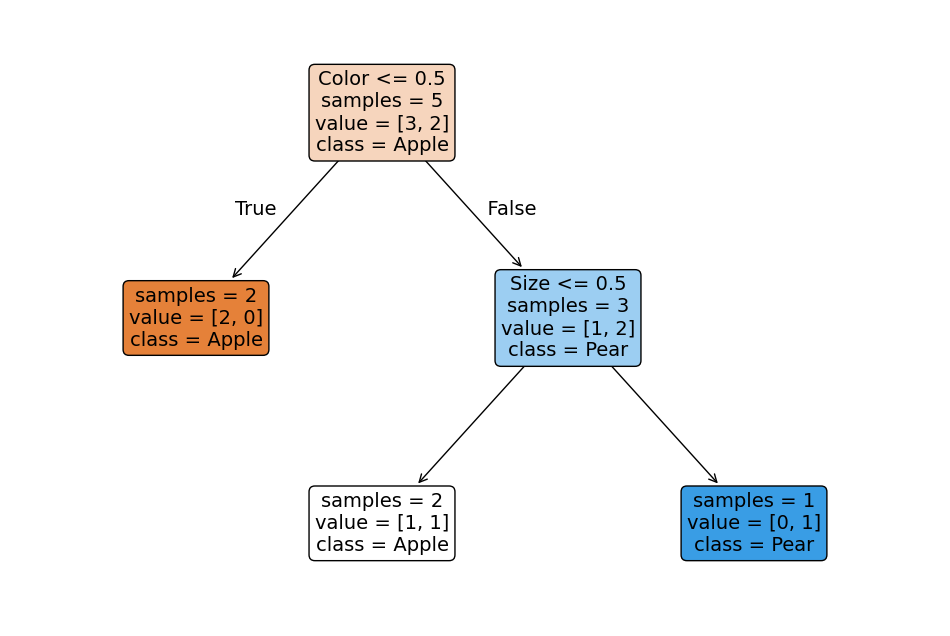

In [56]:

# Создаем и обучаем модель дерева решений
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X, y)

# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=['Color', 'Size'], class_names=['Apple', 'Pear'], filled=True, rounded=True, impurity=False, fontsize=14)
plt.show()

In [57]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y, tree.predict(X)):.2f}')

Accuracy: 0.80


___

In [58]:
# Проверим эффективность модели на большем наборе данных
data = pd.read_csv('..\9_2\Titanic-Dataset-Processed-1.csv')

data

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,...,Embarked_S,G,F,C,T,B,Unknown,D,E,A
0,0,22.000000,1,0,7.2500,False,False,True,True,False,...,True,False,False,False,False,False,True,False,False,False
1,1,38.000000,1,0,71.2833,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,1,26.000000,0,0,7.9250,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1,35.000000,1,0,53.1000,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,0,35.000000,0,0,8.0500,False,False,True,True,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,False,True,False,True,False,...,True,False,False,False,False,False,True,False,False,False
887,1,19.000000,0,0,30.0000,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
888,0,29.699118,1,2,23.4500,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
889,1,26.000000,0,0,30.0000,True,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False


In [59]:
# Определяем признаки и целевую переменную
X = data.drop('Survived', axis=1)
y = data['Survived']

# Разделяем данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создаем и обучаем модель дерева решений
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

print(f'Accuracy: {accuracy_score(y_test, tree.predict(X_test)):.2f}')

Accuracy: 0.81


[Text(0.5, 0.875, 'Sex_male <= 0.5\nsamples = 623\nvalue = [392, 231]\nclass = Died'),
 Text(0.25, 0.625, 'Pclass_3 <= 0.5\nsamples = 213\nvalue = [58, 155]\nclass = Survived'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Age <= 2.5\nsamples = 110\nvalue = [4, 106]\nclass = Survived'),
 Text(0.0625, 0.125, 'samples = 2\nvalue = [1, 1]\nclass = Died'),
 Text(0.1875, 0.125, 'samples = 108\nvalue = [3, 105]\nclass = Survived'),
 Text(0.375, 0.375, 'Fare <= 23.35\nsamples = 103\nvalue = [54, 49]\nclass = Died'),
 Text(0.3125, 0.125, 'samples = 85\nvalue = [37, 48]\nclass = Survived'),
 Text(0.4375, 0.125, 'samples = 18\nvalue = [17, 1]\nclass = Died'),
 Text(0.75, 0.625, 'Age <= 6.5\nsamples = 410\nvalue = [334, 76]\nclass = Died'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'SibSp <= 3.0\nsamples = 20\nvalue = [6, 14]\nclass = Survived'),
 Text(0.5625, 0.125, 'samples = 13\nvalue = [0, 13]\nclass = Survived'),
 Text(0.6875, 0.125, 'samples = 7\nvalue = [6, 1]\nclass = Died'

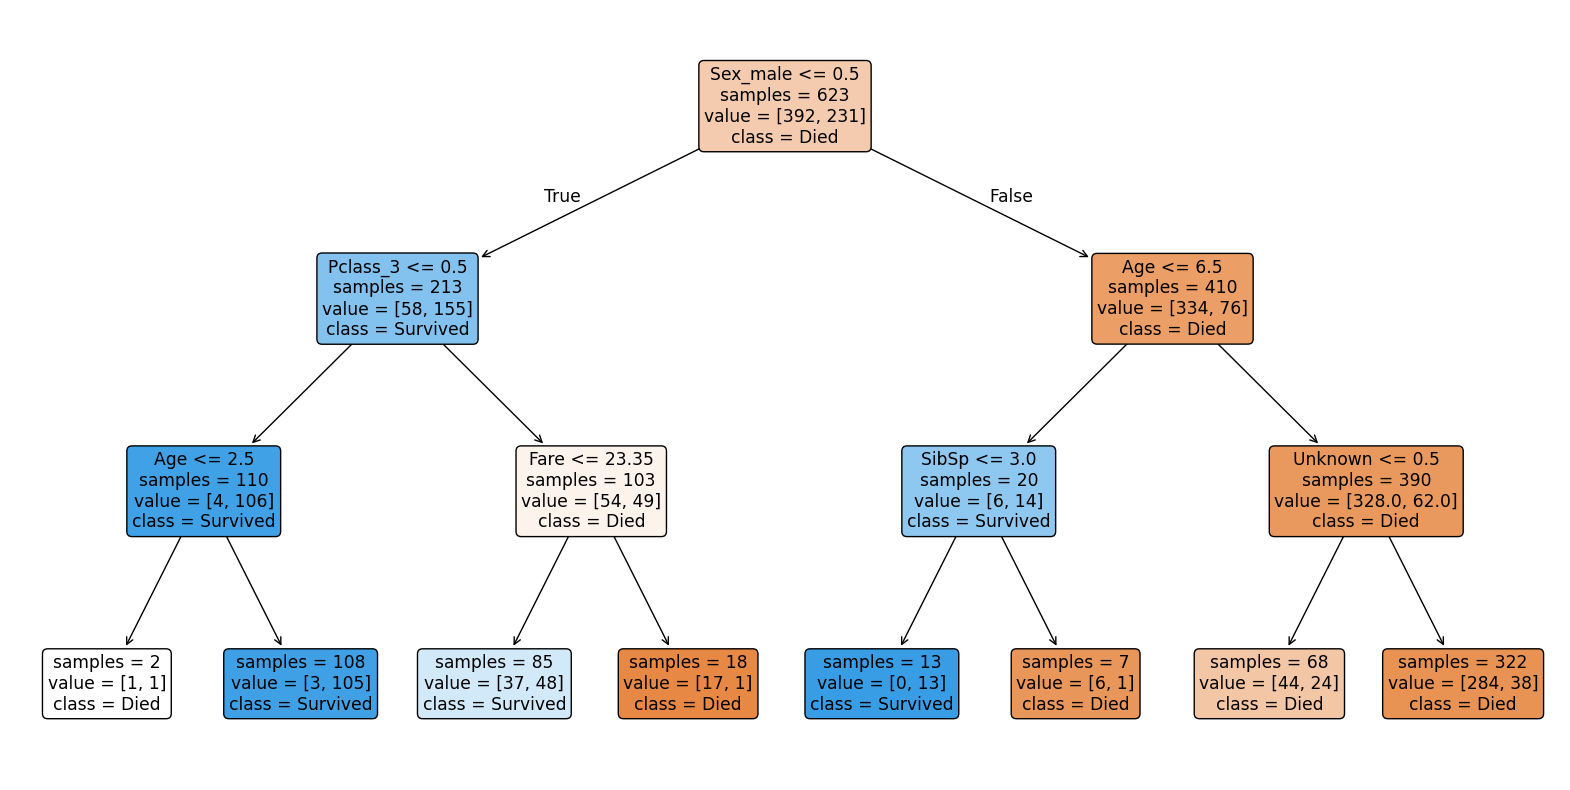

In [60]:
# Визуализация дерева решений
plt.figure(figsize=(20, 10))

#Выведем только условия дерева
plot_tree(tree, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True, rounded=True, impurity=False)